# Notebook for creating the Beauty sessions.csv

In [1]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 400)

import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sessions = []
items = []
timestamp = [] 
rating = []

with open("reviews_Beauty.json") as f: 
    for l in f: 
        interaction = json.loads(l.strip())
        sessions.append(interaction["reviewerID"])
        items.append(interaction["asin"])
        timestamp.append(interaction["unixReviewTime"])
        rating.append("overall")


raw_session_df = pd.DataFrame({"SessionId": sessions, "ItemId": items, "Time": timestamp, "Reward": 1.0})

raw_session_df.head()

,SessionId,ItemId,Time,Reward
0,A39HTATAQ9V7YF,0205616461,1369699200,1.0
1,A3JM6GV9MNOF9X,0558925278,1355443200,1.0
2,A1Z513UWSAAO0F,0558925278,1404691200,1.0
3,A1WMRR494NWEWV,0733001998,1382572800,1.0
4,A3IAAVS479H7M7,0737104473,1274227200,1.0


(array([8.87401e+05, 1.75875e+05, 6.43360e+04, 3.02850e+04, 1.61870e+04,
        9.82700e+03, 6.32400e+03, 4.26000e+03, 3.18100e+03, 2.27500e+03,
        1.74500e+03, 1.40200e+03, 1.01200e+03, 9.12000e+02, 6.77000e+02,
        5.50000e+02, 4.62000e+02, 7.34000e+02]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 18 artists>)

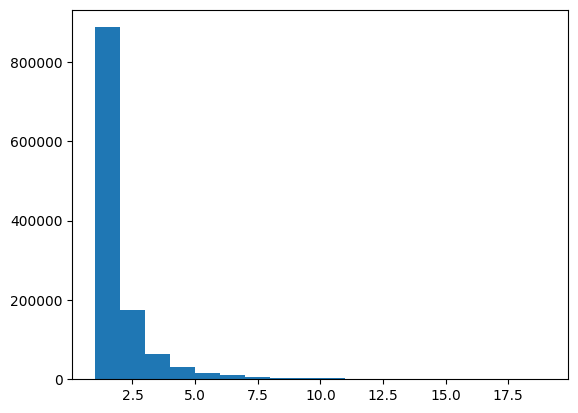

In [3]:
plt.hist(list(dict(raw_session_df["SessionId"].value_counts()).values()), bins=np.arange(1, 20))

In [4]:
len(raw_session_df)

2023070

In [5]:
MIN_NUM_INTERACTIONS = 5

processed_session_df = raw_session_df.copy()
prev_len_processed_session_df = len(processed_session_df)
while True: 
    print("Iteration ")

    # Compute sessions to keep.
    sessions_to_keep = {session for session, value_count in processed_session_df["SessionId"].value_counts().items() if value_count >= MIN_NUM_INTERACTIONS}
    processed_session_df = processed_session_df[processed_session_df["SessionId"].isin(sessions_to_keep)]
    
    # Compute items to keep.
    items_to_keep = {item for item, value_count in processed_session_df["ItemId"].value_counts().items() if value_count >= MIN_NUM_INTERACTIONS}
    processed_session_df = processed_session_df[processed_session_df["ItemId"].isin(items_to_keep)]
    
    if prev_len_processed_session_df == len(processed_session_df):
        break

    prev_len_processed_session_df = len(processed_session_df)

print(f"Number of sessions: {len(sessions_to_keep)}")
print(f"Number of items: {len(items_to_keep)}")
# raw_session_df = raw_session_df[sessions_series.replace(sessions_series.apply(pd.Series.value_counts)).gt(5).all(1)]

# raw_session_df.head(10)

Iteration 
Iteration 
Iteration 
Iteration 
Iteration 
Iteration 
Iteration 
Iteration 
Iteration 
Iteration 
Number of sessions: 22363
Number of items: 12101


In [6]:
processed_session_df.sort_values(by="Time", inplace=True)

In [7]:
processed_session_df.head(10)

,SessionId,ItemId,Time,Reward
15903,A281NPSIMI1C2R,B0000535UX,1023840000,1.0
15679,A281NPSIMI1C2R,B0000535UM,1024185600,1.0
15740,A281NPSIMI1C2R,B0000535UN,1024185600,1.0
25472,AWIF8AR75LL9L,B000065DK4,1036627200,1.0
5597,A281NPSIMI1C2R,B000052Y33,1052611200,1.0
17574,A281NPSIMI1C2R,B0000537NH,1052611200,1.0
30372,AN81JUYW2SL24,B00008BNZ4,1066003200,1.0
25347,A3RGN75LHYAG8U,B000065DJY,1069459200,1.0
5172,A2B7BUH8834Y6M,B000052XZP,1071619200,1.0
11581,A2B7BUH8834Y6M,B00005304H,1071619200,1.0


The file meta_Beauty.json unfortunatley uses both single quotes for its formatting and for its product names, so we need custom code for processing the file.

In [8]:
asins = []
names = []

import re
def find_between_r( s, first, last ):
    try:
        result = re.search(f"{first}(.*?){last}", s)
        if result is not None: 
            return result.group(1)
        else:
            return ""
    except ValueError:
        return ""

with open("meta_Beauty.json") as f: 
    for l in f: 
        asin = find_between_r(l, "'asin': '", "', '")
        title = find_between_r(l, "'title':", ", '")
        
        if title is None or title == "": 
            title = find_between_r(l, "'title':", "}")

        title = title.strip()
        title = title.strip("'")
        title = title.strip('"')

        asins.append(asin)
        names.append(title)

raw_item_df = pd.DataFrame({"ItemId": asins, "ItemName": names})

raw_item_df.head(n=100)

,ItemId,ItemName
0,0205616461,Bio-Active Anti-Aging Serum (Firming Ultra-Hydrating Serum)
1,0558925278,Eco Friendly Ecotools Quality Natural Bamboo Cosmetic Mineral Brush Set Kit of 4 Soft Brushes and 1 Pouch Baby Kabuki Eye Shading Brush Mineral Powder Brush Concealer Brush(travle Size)
2,0733001998,Mastiha Body Lotion
3,0737104473,Hello Kitty Lustre Lipstick (See sellers comments for colors)
4,0762451459,Stephanie Johnson Mermaid Round Snap Mirror
5,1304139212,Set of 2 MAC Lip Care - Lip Pencil - Auburn
6,130414674X,Set of 2 Benefit She Laq Makeup Sealer
7,130414089X,New Benefit Waterproof Automatic Eyeliner Pen - Black - BAD Gal Liner
8,1304196062,Max Factor Lasting Performance Foundation -Pastelle 102 35ml
9,1304146537,Set of 2 Goodskin Labs Eyliplex-2 Eye Life and Circle Reducer - 10ml


In [9]:
character_set_to_replace_str = {
    "&amp;": " and ", 
    "&lt;": "", 
    "&gt;": "", 
    "&ndash": "", 
    "&mdash;": "", 
    "&ensp;": "", 
    "&nbsp;": " ", 
    "&shy;": "", 
    "&copy;": "", 
    "&trade;": "", 
    "&reg;": "",
    "&quot;": ""
    }


for character_set, replace_str in character_set_to_replace_str.items(): 
    raw_item_df["ItemName"] = raw_item_df["ItemName"].str.replace(character_set, replace_str)

raw_item_df.head(10)

,ItemId,ItemName
0,0205616461,Bio-Active Anti-Aging Serum (Firming Ultra-Hydrating Serum)
1,0558925278,Eco Friendly Ecotools Quality Natural Bamboo Cosmetic Mineral Brush Set Kit of 4 Soft Brushes and 1 Pouch Baby Kabuki Eye Shading Brush Mineral Powder Brush Concealer Brush(travle Size)
2,0733001998,Mastiha Body Lotion
3,0737104473,Hello Kitty Lustre Lipstick (See sellers comments for colors)
4,0762451459,Stephanie Johnson Mermaid Round Snap Mirror
5,1304139212,Set of 2 MAC Lip Care - Lip Pencil - Auburn
6,130414674X,Set of 2 Benefit She Laq Makeup Sealer
7,130414089X,New Benefit Waterproof Automatic Eyeliner Pen - Black - BAD Gal Liner
8,1304196062,Max Factor Lasting Performance Foundation -Pastelle 102 35ml
9,1304146537,Set of 2 Goodskin Labs Eyliplex-2 Eye Life and Circle Reducer - 10ml


In [10]:
item_ids = set(processed_session_df["ItemId"].unique())

processed_item_df = raw_item_df[raw_item_df["ItemId"].isin(item_ids)].reset_index(drop=True)

processed_item_df.rename({"ItemId": "global_product_id", "ItemName": "name"}, axis="columns", inplace=True)
processed_item_df.head(10)

,global_product_id,name
0,7806397051,WAWO 15 Color Professionl Makeup Eyeshadow Camouflage Facial Concealer Neutral Palette
1,9759091062,Xtreme Brite Brightening Gel 1oz.
2,9788072216,Prada Candy By Prada Eau De Parfum Spray 1.7 Oz For Women
3,9790790961,"Versace Bright Crystal Eau de Toilette Spray for Women, 3 Ounce"
4,9790794231,Stella McCartney Stella
5,B00004TMFE,"Avalon Biotin B-Complex Thickening Conditioner, 14 Ounce"
6,B00004TUBL,"Better Living Classic Two Chamber Dispenser, White"
7,B00004TUBV,Better Living The Ulti-Mate Dispenser
8,B00004U9V2,Crabtree and Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ
9,B00004U9UY,"Crabtree and Evelyn 2792 Gardeners Hand Therapy (100ml, 3.4 oz)"


In [11]:
session_id_to_int = {session_id: i for i, session_id in enumerate(set(processed_session_df["SessionId"].unique()))}
item_id_to_int = {item_id: i for i, item_id in enumerate(set(processed_item_df["global_product_id"].unique()))}

assert all([item in item_id_to_int for item in set(processed_session_df["ItemId"].unique())])

processed_session_df["SessionId"] = processed_session_df["SessionId"].apply(lambda x : session_id_to_int[x])
processed_session_df["ItemId"] = processed_session_df["ItemId"].apply(lambda x : item_id_to_int[x])

processed_item_df["global_product_id"] = processed_item_df["global_product_id"].apply(lambda x : item_id_to_int[x])

In [12]:
with open("item_id_to_int.json", "w") as file: 
    file.write(json.dumps(item_id_to_int))

with open("session_id_to_int.json", "w") as file:
     file.write(json.dumps(session_id_to_int))

In [15]:
processed_session_df.to_csv("sessions.csv", index=False)
processed_item_df.to_csv("products_lookup.csv")